# Part II - Loan Data from Prosper
## by Chih-Chuan Ma

## Investigation Overview 


The time span of the data is 8 years from 2007 to 2014, and up to 92% of applicants have full-time job and employed. The range of stated monthly salary and revolving credit balance of most borrowers is from 1.2K to 12K and 1K to 100K accordingly; the mojarity of loan purpose is to consolidate the debt. In addition, there are 40% people with more than 90 months working experience. 60% of annual salary ranges from 25,000 to 74,999 while the percentage for those in the group of high annual income (more than 75,000) is around 32%. However, at least one third of "real" occupation is still not clear since the it is categorised as "Other" and "Professional" <br>

A strong negative correlation among upper and lower range of credit score and annual percentage rate can be observed, which is reasonable for borrowers who have better credits enjoy better conditon of loan. Other features with negative correlation with annul percentage rate (APR) include available bankcard credit, the orginal amount of loan, the percentage of trades never delingquent, and monthly loan payment. On the other hand, the higher utilization of bank card causes higher cost of borrowing. Furthermore,People whose employment status categorized as "Other" have highest cost of borrowing while similar level of APR can ben seen for those who have full-time, part-time job, not-employed and self-employed. From the perspective of income range, generally speaking, the higher annual income leads to the lower cost of borrowing. Interestingly, borrowers who are out of job enjoy the same level of APR as those with the highest annual income. Among the top 8 purposes of loan, it's most expenseive if the money is borrowed for house expenses; engnineers and business executives enjoy th least average APR and the similar APR level is seen for the rest occupations. <br>

## Investigation Overview (continue)

In the final section of the analysis, the visualization depicts the areas where the defaulted cases clustered among various features including borrowers' APR, status of employment, stated monthly income and loan payment by regions of different levels of APR. In low APR regions, most fefaulted happened to those below median monthly slary but above median borrower APR while people are more likely to default if stated monthly inome and borrower APR are under the median in high APR region. Finally, the conditions of defaulted by various emlpoyment status and whether borrowers are house owner is analyzed. In-depth multivariate plots describe at which circumstances of montly income and loan payment would the default more likely be.


## Dataset Overview

The dataset records the information of personal loan from Prosper Funding LLC, which mainly runs the business of lending money, creidt card, home equity and personal investment. The oringal dataset contains up to 113,937 data and 81 variables, including range of income, the purpose of loan, region, status of employment, result of the loan application, and even the frequencies of loan inquiries in a certain time span..etc. <br>

In this project, preliminary data wrangling, such as missing data and duplicates removal, will be performed. Also, the value of a certain features, such as  occupation, listing of categories and duration of employment level, are transformed for better understanding. A few nenessary variables for further analysis are reserved as well. The main interest of the analysis is to explore the relationships among cost of borrowering (the APR) and various features. As requested, the data will be investegated followed by visualization of univariate, bivariate, and multi-variate plots. <br>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/Users/johnma/Desktop/prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Transform the format of variables into lower case

df.columns = df.columns.str.lower()

# Check whether the transformation is done
df.columns

Index(['listingkey', 'listingnumber', 'listingcreationdate', 'creditgrade',
       'term', 'loanstatus', 'closeddate', 'borrowerapr', 'borrowerrate',
       'lenderyield', 'estimatedeffectiveyield', 'estimatedloss',
       'estimatedreturn', 'prosperrating (numeric)', 'prosperrating (alpha)',
       'prosperscore', 'listingcategory (numeric)', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'currentlyingroup', 'groupkey',
       'datecreditpulled', 'creditscorerangelower', 'creditscorerangeupper',
       'firstrecordedcreditline', 'currentcreditlines', 'opencreditlines',
       'totalcreditlinespast7years', 'openrevolvingaccounts',
       'openrevolvingmonthlypayment', 'inquirieslast6months', 'totalinquiries',
       'currentdelinquencies', 'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',
       'availa

In [4]:
## Check null in all columns by percentage
# The clolumns with missing values over 25% should be deleted.
# Except 'borrowerapr', rows with missing values should be deleted 
# since it does not make sense to fill-in the mean value and it's not possible to retrieve those information
# The blank value of 'borrowerapr' can be filled in average value, the impact of this manuever should be minor

null_percentage = (df.isnull().sum() / df.shape[0]*100).round(2)

print(null_percentage.sort_values(ascending=False).to_string());

groupkey                               88.29
loanfirstdefaultedcyclenumber          85.12
scorexchangeattimeoflisting            83.39
prosperprincipaloutstanding            80.62
prosperprincipalborrowed               80.62
prosperpaymentsonemonthpluslate        80.62
prosperpaymentslessthanonemonthlate    80.62
ontimeprosperpayments                  80.62
totalprosperloans                      80.62
totalprosperpaymentsbilled             80.62
creditgrade                            74.59
closeddate                             51.65
prosperrating (alpha)                  25.53
prosperscore                           25.53
estimatedreturn                        25.53
prosperrating (numeric)                25.53
estimatedloss                          25.53
estimatedeffectiveyield                25.53
debttoincomeratio                       7.51
employmentstatusduration                6.69
amountdelinquent                        6.69
currentcreditlines                      6.67
bankcardut

In [5]:
# Make a copy of original dataset
df_clean = df.copy()

In [6]:
# Remove list of columns having more than 25% null

col_to_drop = null_percentage[null_percentage>25].keys()
df_clean = df_clean.drop(col_to_drop, axis=1)

null_percentage_clean = (df_clean.isnull().sum() / df.shape[0]*100).round(2)
print(null_percentage_clean.sort_values(ascending=False).to_string());


debttoincomeratio                     7.51
amountdelinquent                      6.69
employmentstatusduration              6.69
revolvingcreditbalance                6.67
bankcardutilization                   6.67
opencreditlines                       6.67
publicrecordslast12months             6.67
currentcreditlines                    6.67
availablebankcardcredit               6.62
totaltrades                           6.62
tradesneverdelinquent (percentage)    6.62
tradesopenedlast6months               6.62
borrowerstate                         4.84
occupation                            3.15
employmentstatus                      1.98
totalinquiries                        1.02
delinquencieslast7years               0.87
publicrecordslast10years              0.61
currentdelinquencies                  0.61
inquirieslast6months                  0.61
totalcreditlinespast7years            0.61
firstrecordedcreditline               0.61
creditscorerangeupper                 0.52
creditscore

In [7]:
# Delete rows with missing values
df_clean.dropna(axis=0,inplace=True)

# Check is there any null value
missing_df_clean = df_clean.isna().sum().sort_values(ascending=False)
print (missing_df_clean.to_string());

listingkey                            0
loanoriginationquarter                0
totaltrades                           0
tradesneverdelinquent (percentage)    0
tradesopenedlast6months               0
debttoincomeratio                     0
incomerange                           0
incomeverifiable                      0
statedmonthlyincome                   0
loankey                               0
loancurrentdaysdelinquent             0
loanmonthssinceorigination            0
loannumber                            0
loanoriginalamount                    0
loanoriginationdate                   0
memberkey                             0
bankcardutilization                   0
monthlyloanpayment                    0
lp_customerpayments                   0
lp_customerprincipalpayments          0
lp_interestandfees                    0
lp_servicefees                        0
lp_collectionfees                     0
lp_grossprincipalloss                 0
lp_netprincipalloss                   0


In [8]:
# Remove duplicate
df_clean.drop_duplicates(inplace=True)

# Check does any duplicate exist
df_clean.duplicated().sum()

0

In [9]:
# Extract 'timestamp' by date
df_clean['date'] = pd.to_datetime(df_clean['listingcreationdate']).dt.date

# Extract 'timestamp' by date
df_clean['month'] = pd.to_datetime(df_clean['listingcreationdate']).dt.month


# Check time span of the cleaned dataset
df_clean.date.min(), df_clean.date.max()

(datetime.date(2007, 2, 12), datetime.date(2014, 3, 10))

In [10]:
bin_edges = [0,30,60,90,755]
bin_names = ['0-30','30-60' ,'60-90' ,'over 90' ]

# Create a age_levels column
df_clean['employmentstatusduration_levels'] = pd.cut(df['employmentstatusduration'], bin_edges, labels=bin_names, include_lowest=True)

# Check for successful creation of this column
df_clean['employmentstatusduration_levels'].unique()

['0-30', '30-60', 'over 90', '60-90']
Categories (4, object): ['0-30' < '30-60' < '60-90' < 'over 90']

In [11]:
## Trim the variables
# After reviewing the definition of variables, reserve columns I think they are necessary

cols = ['month','date', 'term', 'loanstatus','borrowerapr','lenderyield','listingcategory (numeric)',
        'borrowerstate','occupation','employmentstatus','employmentstatusduration_levels',
       'isborrowerhomeowner','creditscorerangelower','creditscorerangeupper','currentcreditlines',
         'opencreditlines','totalcreditlinespast7years','openrevolvingaccounts','openrevolvingmonthlypayment',
       'inquirieslast6months','totalinquiries','currentdelinquencies','amountdelinquent','delinquencieslast7years',
       'publicrecordslast10years','publicrecordslast12months','revolvingcreditbalance','bankcardutilization',
        'availablebankcardcredit','totaltrades','tradesneverdelinquent (percentage)','tradesopenedlast6months','debttoincomeratio',
        'incomerange','incomeverifiable','statedmonthlyincome','loanoriginalamount','monthlyloanpayment'
       ]
df_clean = df_clean[cols]
df_clean.columns

Index(['month', 'date', 'term', 'loanstatus', 'borrowerapr', 'lenderyield',
       'listingcategory (numeric)', 'borrowerstate', 'occupation',
       'employmentstatus', 'employmentstatusduration_levels',
       'isborrowerhomeowner', 'creditscorerangelower', 'creditscorerangeupper',
       'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years',
       'openrevolvingaccounts', 'openrevolvingmonthlypayment',
       'inquirieslast6months', 'totalinquiries', 'currentdelinquencies',
       'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',
       'availablebankcardcredit', 'totaltrades',
       'tradesneverdelinquent (percentage)', 'tradesopenedlast6months',
       'debttoincomeratio', 'incomerange', 'incomeverifiable',
       'statedmonthlyincome', 'loanoriginalamount', 'monthlyloanpayment'],
      dtype='object')

In [12]:
# Transform listing category from integar into description

df_clean = df_clean.replace({'listingcategory (numeric)' : { 0: 'Not Available',
                                                             1:'Debt Consolidation',
                                                             2:'Home Improvement',
                                                             3:'Business',
                                                             4:'Personal Loan',
                                                             5:'Student Use',
                                                             6:'Auto',
                                                             7:'Other',
                                                             8:'Baby&Adoption',
                                                             9:'Boat',
                                                             10:'Cosmetic Procedure',
                                                             11:'Engagement Ring',
                                                             12:'Green Loans',
                                                             13:'Household Expenses',
                                                             14:'Large Purchases',
                                                             15:'Medical/Dental',
                                                             16:'Motorcycle',
                                                             17:' RV',
                                                             18:'Taxes',
                                                             19:'Vacation',
                                                             20:'Wedding Loans'
                                                           }})

# Check the transformation
print (df_clean['listingcategory (numeric)'].value_counts().sort_values(ascending=False).to_string())

Debt Consolidation    52925
Other                  9399
Not Available          7483
Home Improvement       6875
Business               5168
Auto                   2346
Personal Loan          2259
Household Expenses     1759
Medical/Dental         1369
Large Purchases         783
Taxes                   780
Wedding Loans           721
Vacation                709
Student Use             604
Motorcycle              289
Engagement Ring         198
Baby&Adoption           188
Boat                     83
Cosmetic Procedure       82
 RV                      49
Green Loans              44


In [13]:
## Trim similar job category ##
# Sales: Sales - Retail , Sales - Commission
# Law Professionals: Attorney, Judge
# Trademan: Tradesman - Mechanic, Tradesman - Electrician, Tradesman - Carpenter, Tradesman - Plumber
# Student: Student - College Senior, Student - College Sophomore， Student - College Junior， Student - Community College, Student - College Freshman, Student - Technical School
# Engineer: Computer Programmer, Engineer - Mechanical, Engineer - Electrical, Engineer - Chemical
# Religious: Clergy
# Military: Military Enlisted, Military Officer
# Skilled Labor： Laborer
# Medical Professionals: Nurse (RN), Nurse (LPN), Dentist, Medical Technician, Pharmacist, Doctor
# Driver: Truck Driver, Bus Driver
# Food Service: Food Service Management, Food Service
# Education Professionals: Teacher, Principal, Professor


df_clean = df_clean.replace({'occupation' : {'Sales - Retail': 'Sales',
                                             'Sales - Commission': "Sales",
                                             'Tradesman - Mechanic' : 'Trademan', 
                                             'Tradesman - Electrician':'Trademan',
                                             'Tradesman - Carpenter': 'Trademan',
                                             'Tradesman - Plumber': 'Trademan',
                                             'Student - College Senior': 'Student',
                                             'Student - College Sophomore':'Student',
                                             'Student - College Junior': 'Student',
                                             'Student - Community College': 'Student',
                                             'Student - College Freshman': 'Student',
                                             'Student - Technical School':'Student',
                                             'Student - College Graduate Student':'Student',
                                             'Computer Programmer': 'Engineer',
                                             'Engineer - Mechanical':'Engineer',
                                             'Engineer - Electrical':'Engineer',
                                             'Engineer - Chemical': 'Engineer',
                                             'Clergy': 'Religious',
                                             'Military Enlisted':'Military Professionals',
                                             'Military Officer': 'Military Professionals',
                                             'Laborer':'Skilled Labor',
                                             'Nurse (RN)': 'Medical Professionals',
                                             'Nurse (LPN)': 'Medical Professionals',
                                             'Dentist': 'Medical Professionals',
                                             'Medical Technician': 'Medical Professionals',
                                             'Pharmacist': 'Medical Professionals',
                                             'Doctor': 'Medical Professionals',
                                             'Attorney':'Law Professionals',
                                             'Judge':'Law Professionals',
                                             'Truck Driver': 'Driver',
                                             'Bus Driver':'Driver',
                                             'Food Service Management': 'Food Service',
                                             'Teacher':'Education Professionals',
                                             'Principal': 'Education Professionals',
                                             'Professor':'Education Professionals'
                                            }})

# Check the transformation

print (df_clean['occupation'].value_counts().sort_values(ascending=False).to_string())

Other                                23162
Professional                         12033
Engineer                              6407
Sales                                 4863
Medical Professionals                 4551
Education Professionals               4197
Skilled Labor                         3846
Executive                             3786
Administrative Assistant              3318
Analyst                               3316
Accountant/CPA                        2877
Clerical                              2690
Retail Management                     2301
Food Service                          2034
Driver                                1723
Police Officer/Correction Officer     1487
Trademan                              1428
Military Professionals                1417
Civil Service                         1372
Construction                          1353
Law Professionals                      845
Social Worker                          672
Postal Service                         582
Nurse's Aid

In [14]:
print (df_clean.loanstatus.unique())
print ('====================================')
print (df_clean['listingcategory (numeric)'].unique())
print ('====================================')
print (df_clean['employmentstatus'].unique())
print ('====================================')
print (df_clean['employmentstatusduration_levels'].unique())
print ('====================================')
print (df_clean['incomerange'].unique())
print ('====================================')
print (df_clean['occupation'].unique())

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Past Due (61-90 days)' 'Past Due (31-60 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)'
 'Cancelled']
['Not Available' 'Home Improvement' 'Motorcycle' 'Debt Consolidation'
 'Other' 'Household Expenses' 'Auto' 'Medical/Dental' 'Wedding Loans'
 'Vacation' 'Taxes' 'Baby&Adoption' 'Personal Loan' 'Business'
 'Engagement Ring' 'Large Purchases' 'Student Use' 'Boat' ' RV'
 'Cosmetic Procedure' 'Green Loans']
['Self-employed' 'Employed' 'Other' 'Full-time' 'Not employed' 'Part-time'
 'Retired']
['0-30', '30-60', 'over 90', '60-90']
Categories (4, object): ['0-30' < '30-60' < '60-90' < 'over 90']
['$25,000-49,999' '$50,000-74,999' '$100,000+' '$75,000-99,999'
 '$1-24,999' 'Not employed' 'Not displayed']
['Other' 'Professional' 'Skilled Labor' 'Executive' 'Sales' 'Food Service'
 'Fireman' 'Construction' 'Engineer' 'Retail Management'
 'Military Professionals' 'Cleric

## Univariate Plot
### State of Borrowers & Term of Loan

Most of the loan borrowers came from CA, reached at more than 12000 people, and the sum of applicants from CA are more than the combination of NY and FL. The majority of loan people applied for 36 month, following by 60 months and 12 months. <br>


Text(0, 0.5, 'Frequency')

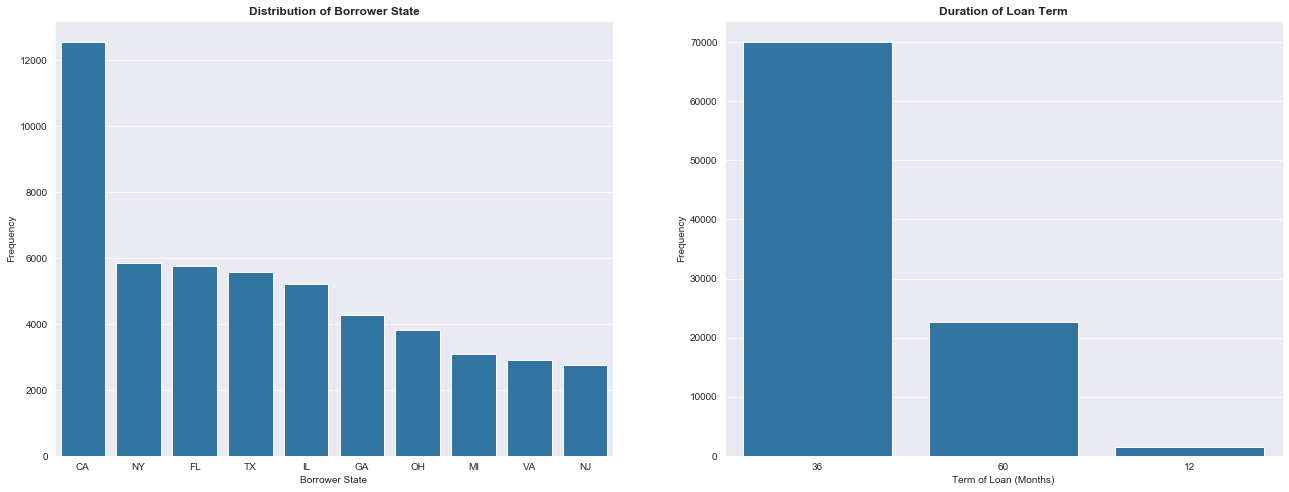

In [15]:
## Bar plot for borrower State and duration of loan term

plt.figure(figsize = [22, 8])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(1, 2, 1)
order = df_clean['borrowerstate'].value_counts().iloc[:10].index
sb.countplot (data=df_clean, x='borrowerstate', color=base_color, order = order)
plt.title('Distribution of Borrower State', weight='bold')
plt.xlabel('Borrower State')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
order = df_clean['term'].value_counts().index
sb.countplot (data=df_clean, x='term', color=base_color, order = order)
plt.title('Duration of Loan Term', weight='bold')
plt.xlabel('Term of Loan (Months)')
plt.ylabel('Frequency')

### Frequency of Employment status

Over 68% of the loan applicats are employed, following by 26% of 'Full-time' and less than 1% of 'Part-time'. However, in my view, the questionnaire 'Employed', 'Full-time', and 'Part-time' are quite ambiguious since both 'Full-time' and 'Part-time' can be categorized as employed. <br>

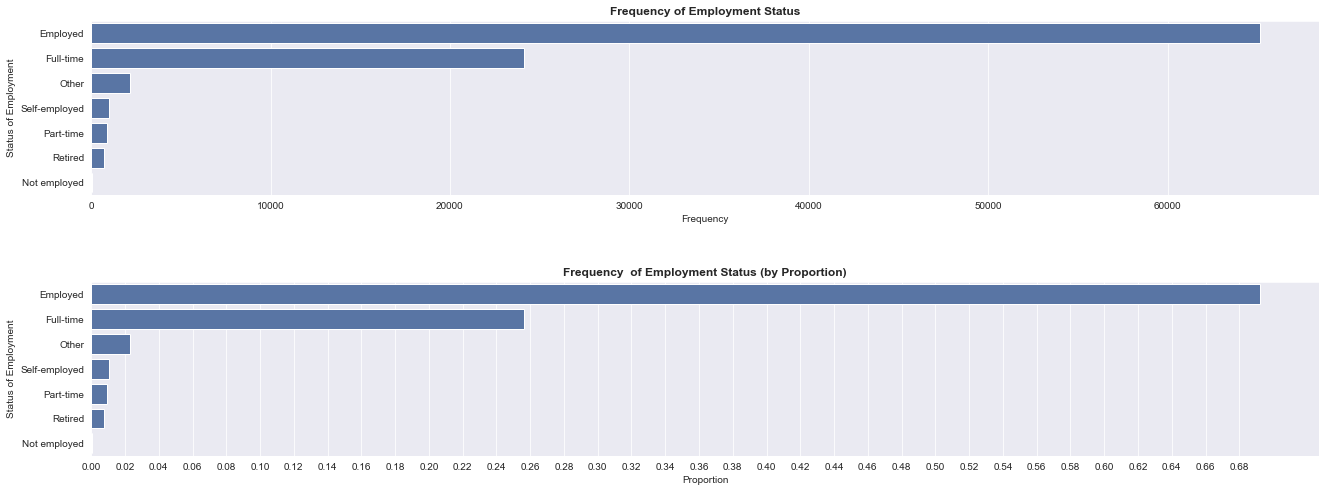

In [16]:
## Bar plot for employment status ##

plt.figure(figsize = [22, 8])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(2, 1, 1)
order = df_clean['employmentstatus'].value_counts().index
sb.countplot (data=df_clean, y='employmentstatus', color=base_color, order = order)
plt.title('Frequency of Employment Status', weight='bold')
plt.ylabel('Status of Employment')
plt.xlabel('Frequency')

plt.subplot(2, 1, 2)
type_counts = df_clean['employmentstatus'].value_counts()
type_order = type_counts.index

n_estatus = df_clean['employmentstatus'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_estatus


tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df_clean, y = 'employmentstatus', color = base_color, order = type_order)
plt.xticks(tick_props * n_estatus, tick_names)
plt.title('Frequency  of Employment Status (by Proportion)', weight='bold')
plt.ylabel('Status of Employment')
plt.xlabel('Proportion');

### Frequency of Listing Categories 

By displaying the top 10 listing of loan, the most common purpose of loan is for debt consolidation, reached at more than 56%; 8% of usage of loan is unknown and 7 % is planed to be used in house rennovation. The usage of business achieved more than 5%, compared to less than 3% for vehicles, personal loan, expenses on household, and medical or dental accordingly. <br>

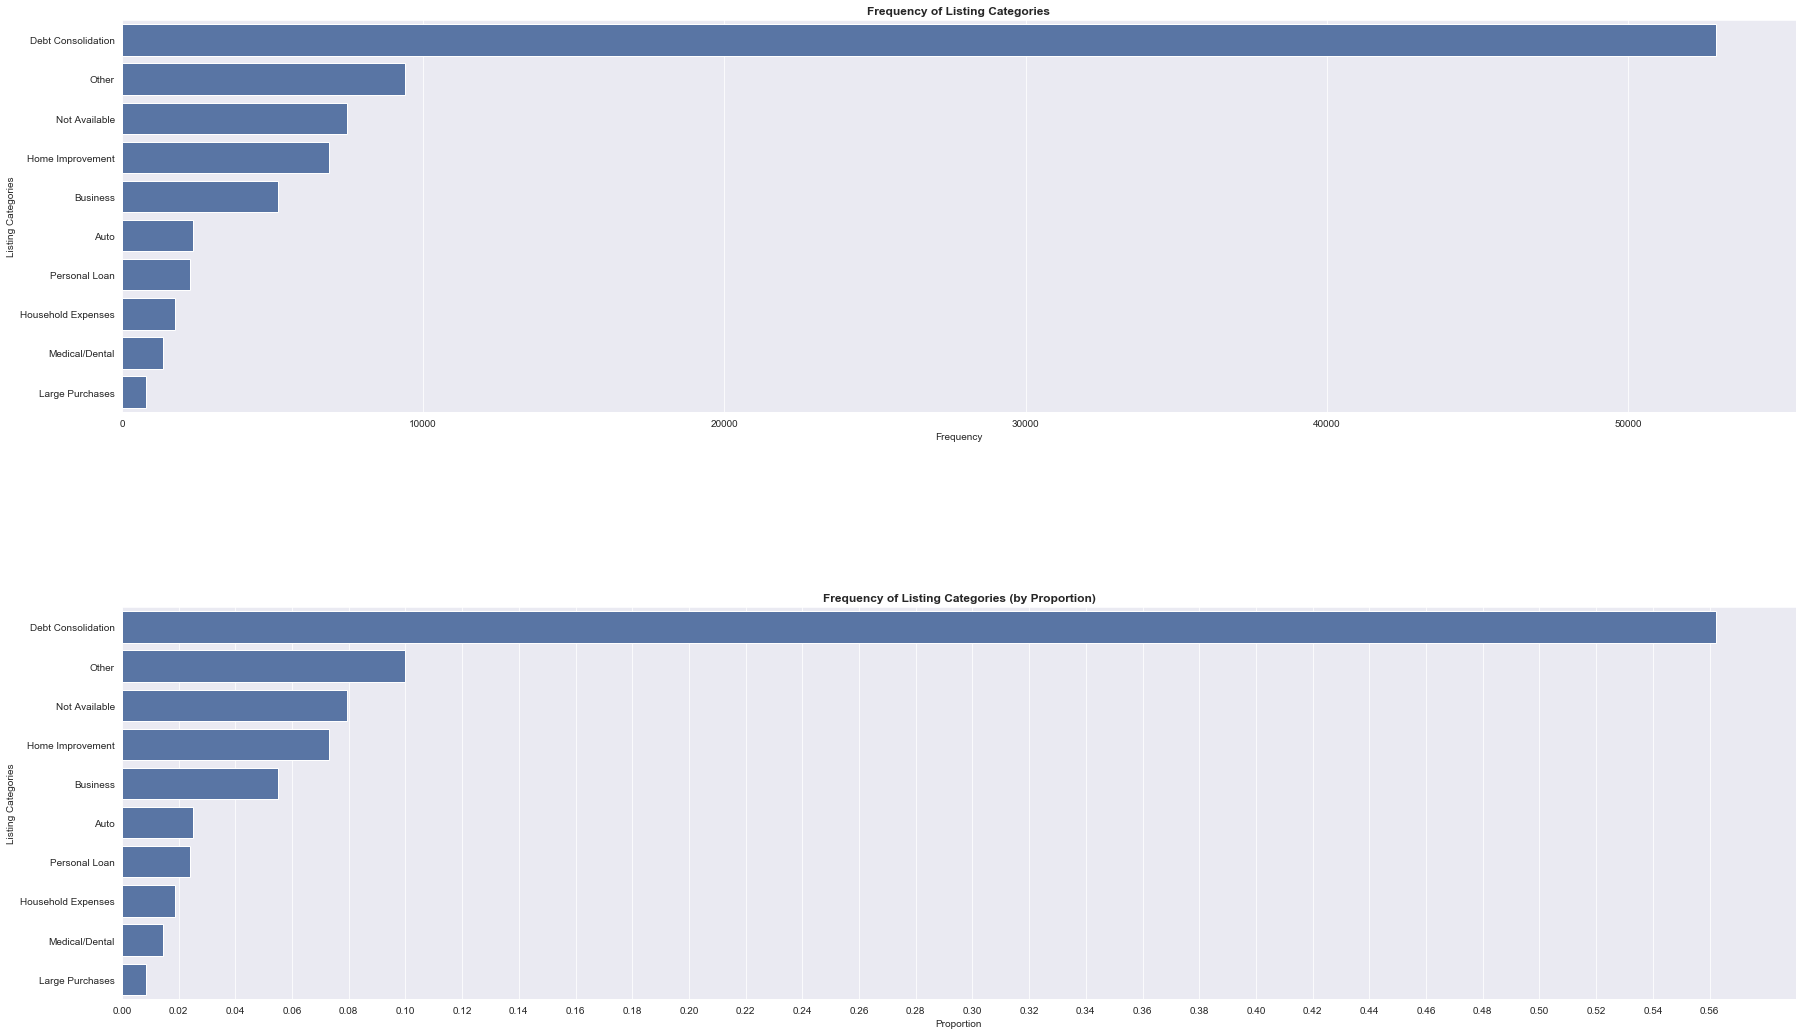

In [17]:
## Bar plot of Listing Categories ##

plt.figure(figsize = [30, 18])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(2, 1, 1)
order = df_clean['listingcategory (numeric)'].value_counts().iloc[:10].index
sb.countplot (data=df_clean, y='listingcategory (numeric)', color=base_color, order = order)
plt.title('Frequency of Listing Categories', weight='bold')
plt.ylabel('Listing Categories')
plt.xlabel('Frequency')

plt.subplot(2, 1, 2)
type_counts = df_clean['listingcategory (numeric)'].value_counts()
type_order = type_counts.iloc[:10].index


# Compute largest proportion

n_lstatus = df_clean['listingcategory (numeric)'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_lstatus
# establish tick locations and create plot

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df_clean, y = 'listingcategory (numeric)', color = base_color, order = type_order)
plt.xticks(tick_props * n_lstatus, tick_names)
plt.title('Frequency of Listing Categories (by Proportion)', weight='bold')
plt.ylabel('Listing Categories')
plt.xlabel('Proportion');

## Bivariate Exploration 
### Heatmap for Numerical Features

Among numerical factors, the upper and lower range of credit score have the strongest negative correlation with borrowers' APR. That is, the higher the credit score range, the lower the loan cost for borrowers. <br>

Several negative correlated factors are observed, including available bankcard credit, the orginal amount of loan, the percentage of trades never delingquent, and monthly loan payment. <br>

Compared to other numerical variables, the utilization of bankcard is relatively positive correlated with borrower annual percentage rate. It is regarded as more risky for lender if borrowers utilize the higher amount of bankcard credit.<br>

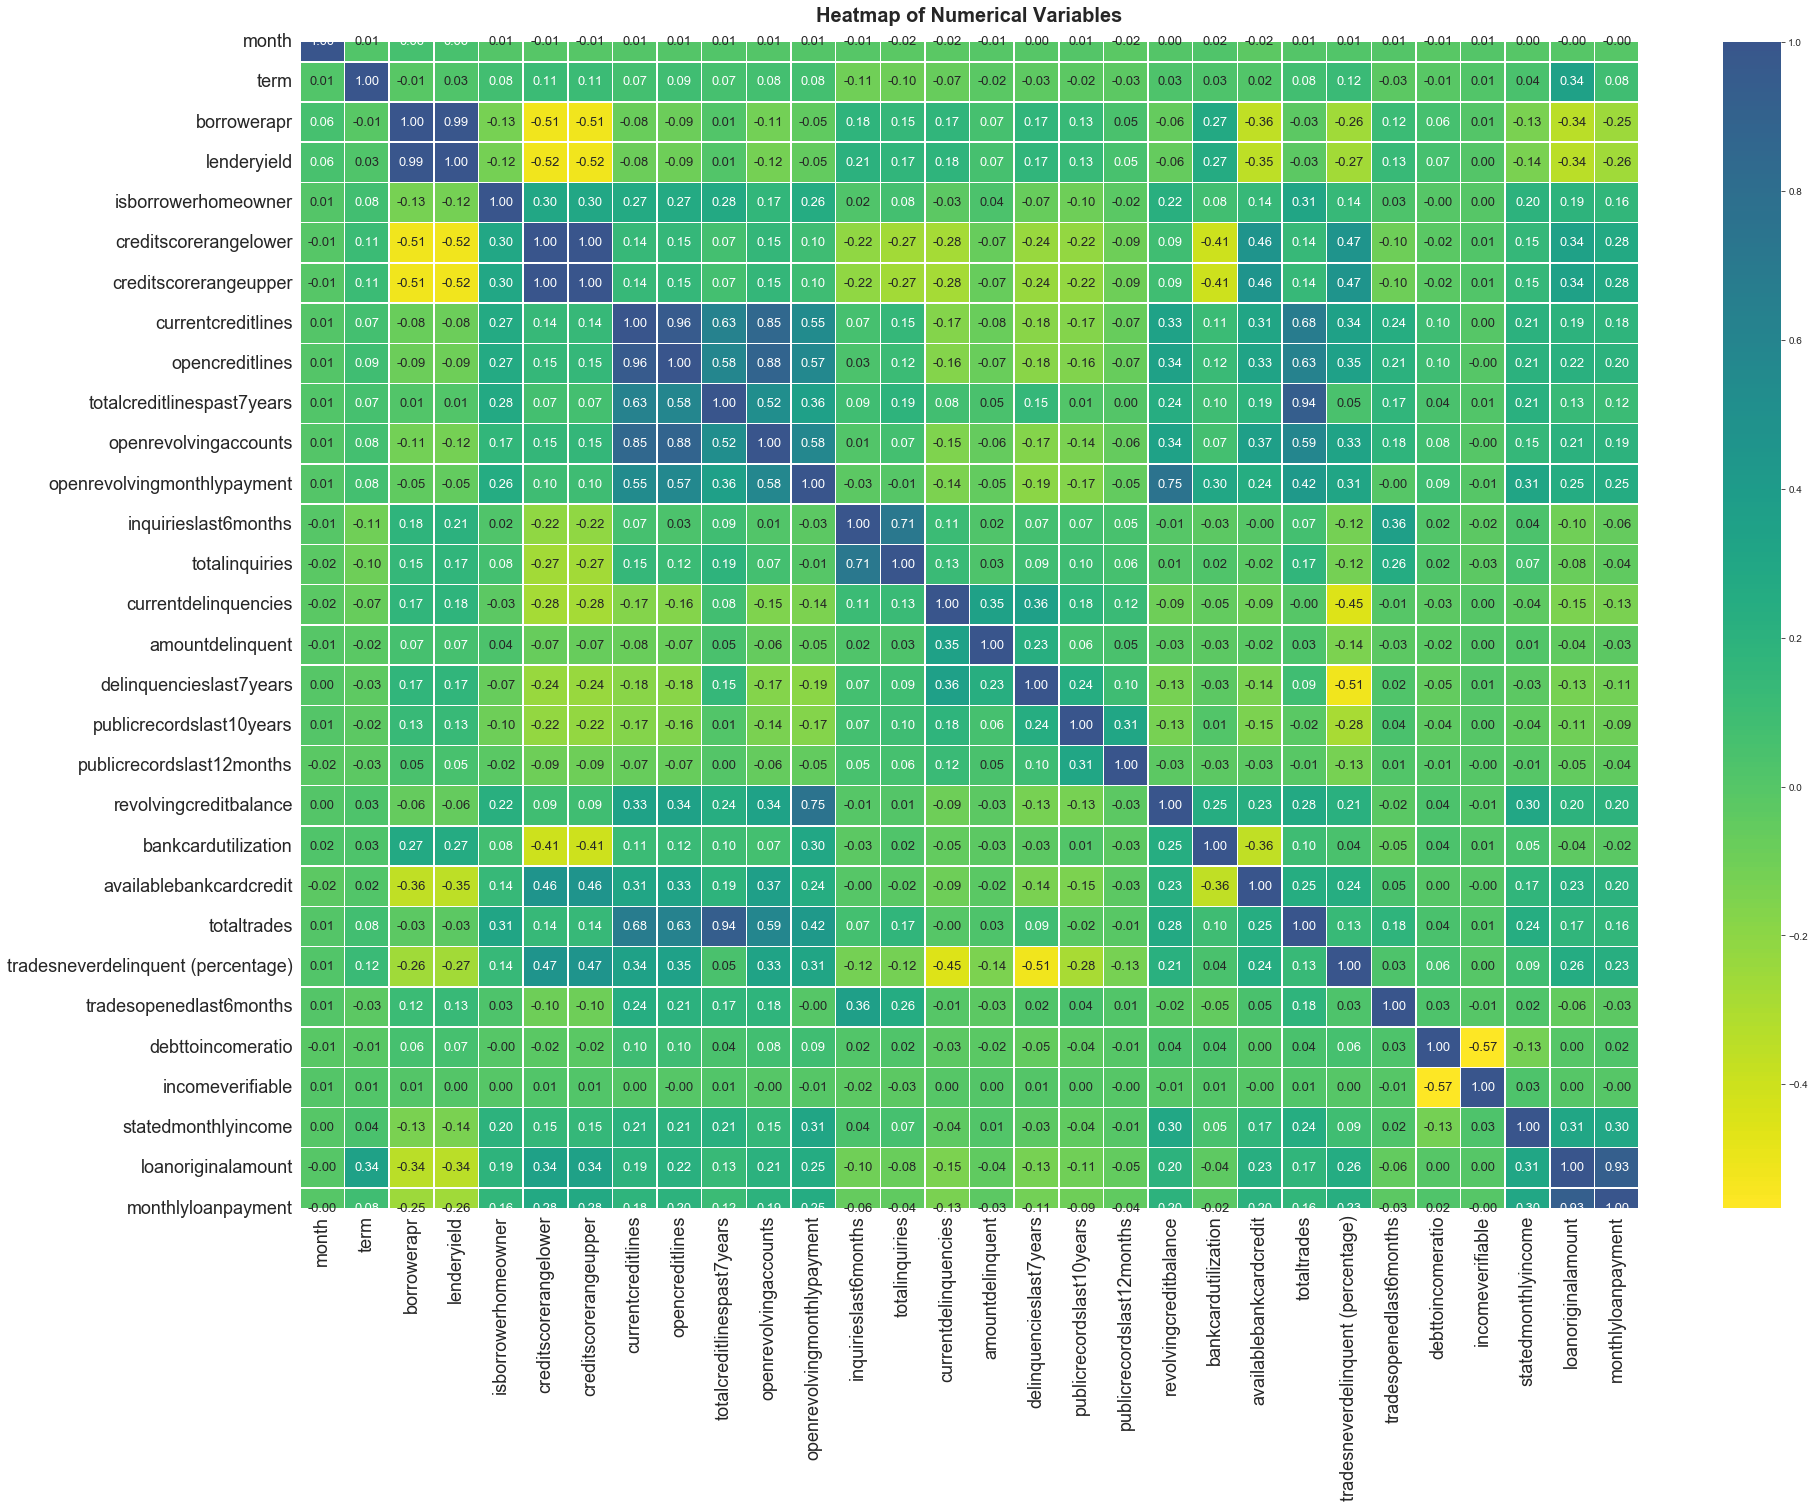

In [18]:
plt.figure(figsize=(30,24))
plt.subplots_adjust(top=0.8) 
sb.heatmap(df_clean.corr(), annot=True, cmap='viridis_r', fmt='.2f', linewidths=0.5, 
           center=0.5, annot_kws = {'fontsize':13})

plt.title ('Heatmap of Numerical Variables', weight='bold', size=20, pad=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show();

### Box & Violin Plots for Employment Status, Range of Income, and Listing Categories

People with employment status in "Other" have the highest average APR while those who have full-time, part-time job, not-employed and self-employed have similar level of APR. Furthermore, it's interesting to observe that people who are employed and retired have higher average APR than not-employed. <br>

Regarding to the income range, the trend in general can be observed that the higher the annual salary, the lower the average APR. Surprisingly, for those who are not employed have the same level of APR as people with hieghest annual income. <br>

Among the top 8 listing categories, the loan purpose for houshold expense has the highest average APR while personal loan has the least. <br>


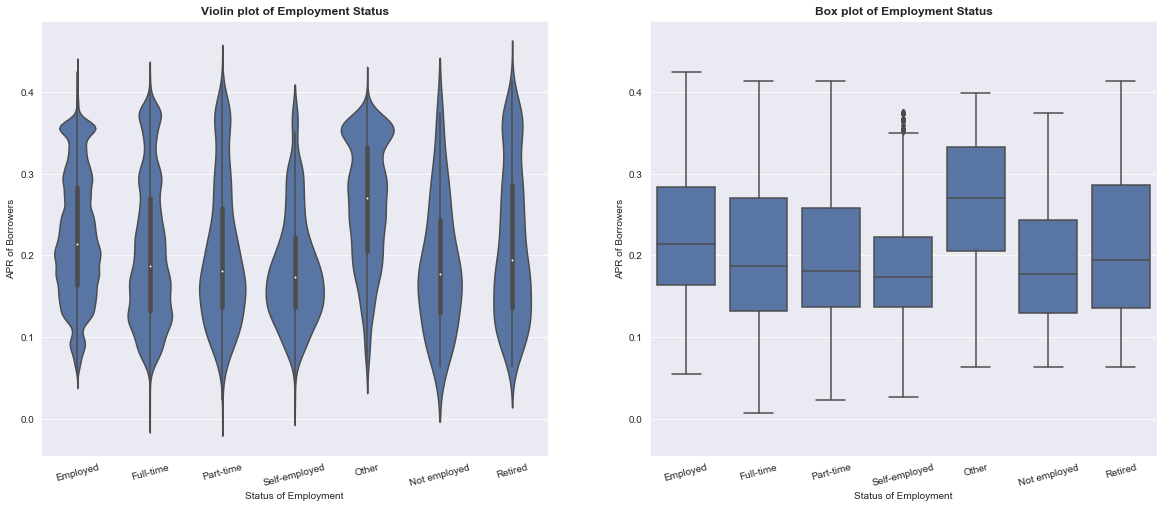

In [19]:
# Replationship between employment status and APR by violin and box plot

estatus_classes = ['Employed', 'Full-time', 'Part-time', 'Self-employed' ,'Other', 'Not employed','Retired']

eclasses = pd.api.types.CategoricalDtype(ordered=True, categories=estatus_classes)

df_clean['employmentstatus'] = df_clean['employmentstatus'].astype(eclasses);

plt.figure(figsize = [20, 8])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df_clean, x='employmentstatus', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Violin plot of Employment Status', weight='bold')
plt.xlabel('Status of Employment')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='employmentstatus', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Box plot of Employment Status', weight='bold')
plt.xlabel('Status of Employment')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

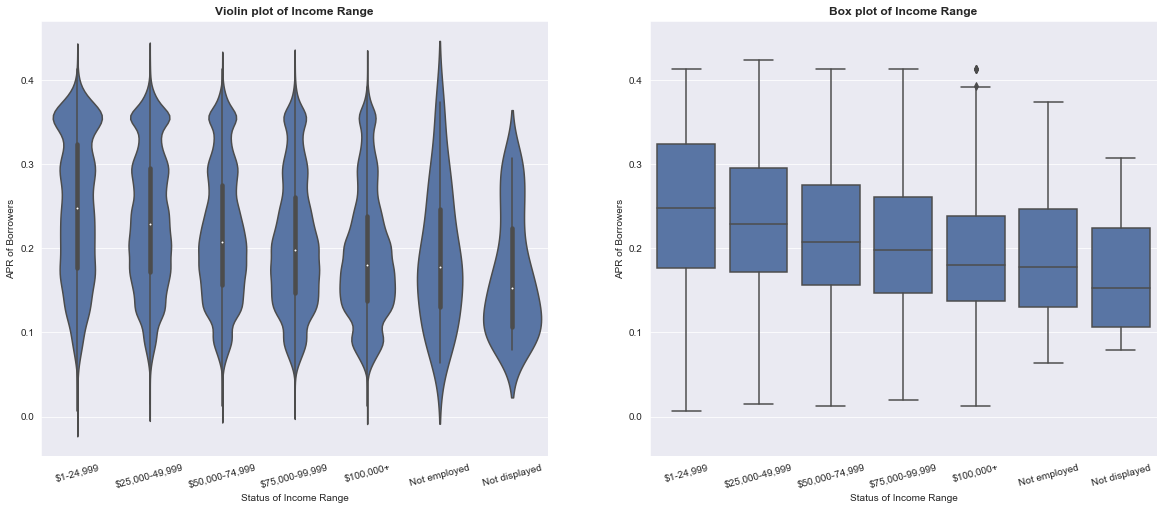

In [20]:
# Replationship between Income range and APR by violin and box plot

istatus_classes = ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+',
                   'Not employed' ,'Not displayed']

iclasses = pd.api.types.CategoricalDtype(ordered=True, categories=istatus_classes)

df_clean['incomerange'] = df_clean['incomerange'].astype(iclasses)

plt.figure(figsize = [20, 8])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df_clean, x='incomerange', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Violin plot of Income Range', weight='bold')
plt.xlabel('Status of Income Range')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='incomerange', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Box plot of Income Range', weight='bold')
plt.xlabel('Status of Income Range')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

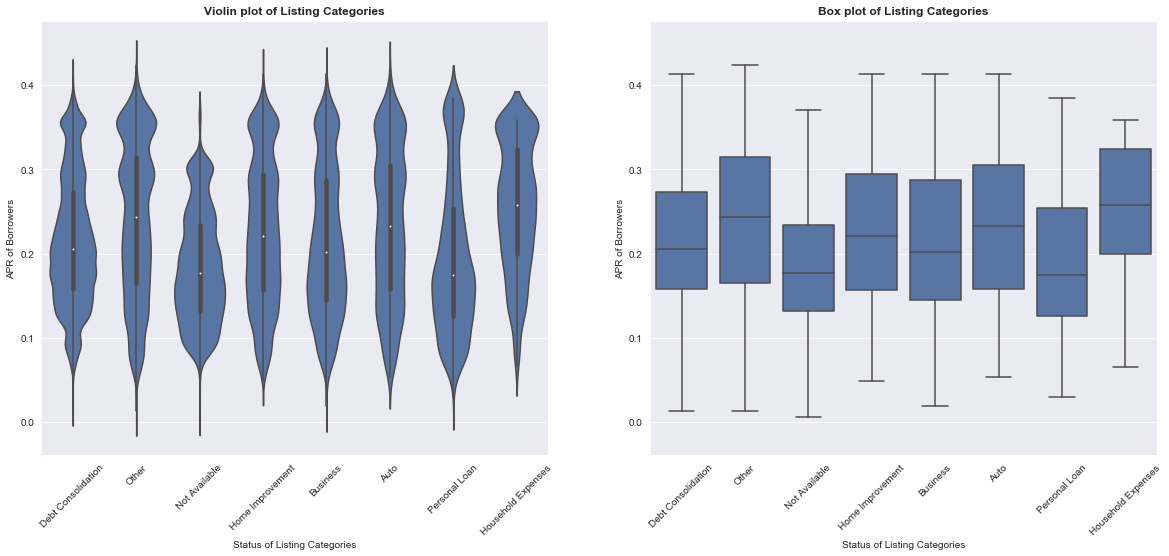

In [21]:
# Replationship between listing categories and APR by violin and box plot

plt.figure(figsize = [20, 8])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
order = df_clean['listingcategory (numeric)'].value_counts().iloc[:8].index
ax1 = sb.violinplot(data=df_clean, x='listingcategory (numeric)', y='borrowerapr', color=base_color, order=order)
plt.xticks(rotation=45)
plt.title('Violin plot of Listing Categories', weight='bold')
plt.xlabel('Status of Listing Categories')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='listingcategory (numeric)', y='borrowerapr', color=base_color, order=order)
plt.xticks(rotation=45)
plt.title('Box plot of Listing Categories', weight='bold')
plt.xlabel('Status of Listing Categories')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

## Multivariate Exploration
### Relationshipt among APR and whether borrower is house owner, different employment status, and income range

Owning a property is quite helpful to strive for better condition of APR. Obviously, in all employment status, the average APR for people owning a property is lower than those who do not, unless the loan applicants are not employed. No obvious lower APR is observed if borrower is out of a job, eventhough he/she owns a house.<br>

Regarding to the various ranges of income, a clear trend of gradually decreased APR for house owner can be seen. Interestingly, borrowers owning a house but not employed enjoy better condition of APR, which is contradicted by the observation above; moreover, for loan appoicants with the lowest salary range, having a property does not encourage lender to offer a better condition.<br>

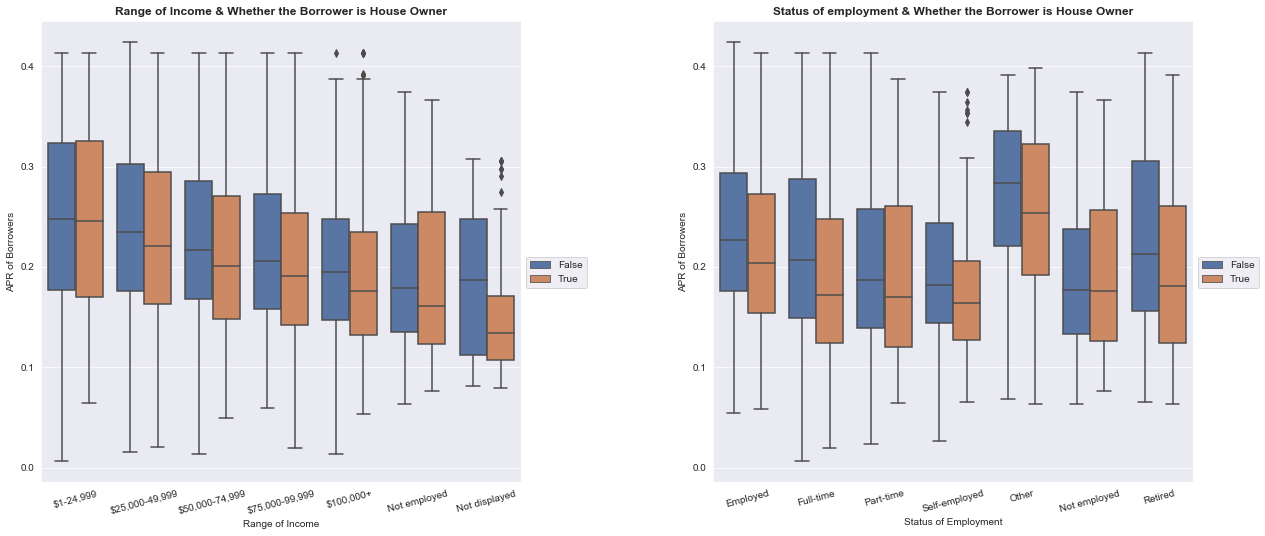

In [22]:

# Box Plot to reveal the relationshipt among APR and whether borrower is house owner, different employment status, and income range

plt.figure(figsize = [20, 8])
sb.set_theme({'axes.grid' : True})
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# Box plot -- income range, borrower apr, house owner
plt.subplot(1, 2, 1)
sb.boxplot(data = df_clean, x = 'incomerange', y = 'borrowerapr', hue = 'isborrowerhomeowner')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 0.5)) 
plt.xticks(rotation = 15)
plt.title('Range of Income & Whether the Borrower is House Owner', weight='bold')
plt.xlabel('Range of Income')
plt.ylabel('APR of Borrowers')

# Box plot -- employment status, borrower apr, house owner
plt.subplot(1, 2, 2)
sb.boxplot(data = df_clean, x = 'employmentstatus', y = 'borrowerapr', hue = 'isborrowerhomeowner')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 0.5)) 
plt.xticks(rotation = 15)
plt.title('Status of employment & Whether the Borrower is House Owner', weight='bold')
plt.xlabel('Status of Employment')
plt.ylabel('APR of Borrowers');

### Relationship among APR, Stated Monthly Income, and Status of Loan by high & low APR region

By seperating regions of high APR and low APR, the characateristics of defaulted cases in different states can be observed. By setting the median of stated monthly income and borrower APR of all regions as reference lines, the partitions of default can be segmented. <br>

In the states of higher APR, the majority of defaulted applicants are those who below median monthly income but above median borrowering APR. As for the states of lower APR, the defaulted cases lies in the area where borrowers below both median of stated monthly salary and borrowers' APR.<br>

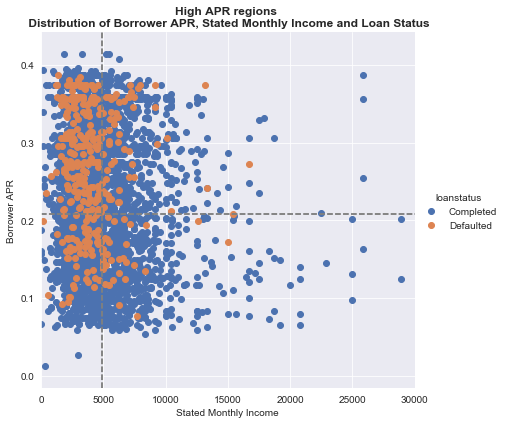

In [23]:
# Filter loan status as "Completed" and "Defaulted" in HIGH APR states

df_filter_high = df_clean[(df_clean['loanstatus'].isin(['Completed','Defaulted'])) & 
                     (df_clean['borrowerstate'].isin(['AR','AL','SD','MS','NV','KY','ND','TN','PA','MO']))]

# Filter loan status as "Completed" and "Defaulted" in LOW APR states

df_filter_low = df_clean[(df_clean['loanstatus'].isin(['Completed','Defaulted'])) & 
                     (df_clean['borrowerstate'].isin(['ME','IA','DC','AK','CO','MA','VT','WA','DE','WI']))]

# plotting -- In higher APR regions, plot APR, Stated Monthly Income and Loan Status

#plt.figure(figsize = [20, 8])
#plt.subplots_adjust(hspace=0.5)
#sb.set_theme({'axes.grid' : True})

g = sb.FacetGrid(data=df_filter_high, hue='loanstatus', height = 6)
g.map(plt.scatter, 'statedmonthlyincome', 'borrowerapr')
plt.xlim(0,30000)
plt.title ('High APR regions \n Distribution of Borrower APR, Stated Monthly Income and Loan Status', weight='bold')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Borrower APR')
g.refline(x=df_clean["statedmonthlyincome"].median())
g.refline(y=df_clean["borrowerapr"].median())
g.add_legend()

plt.show();


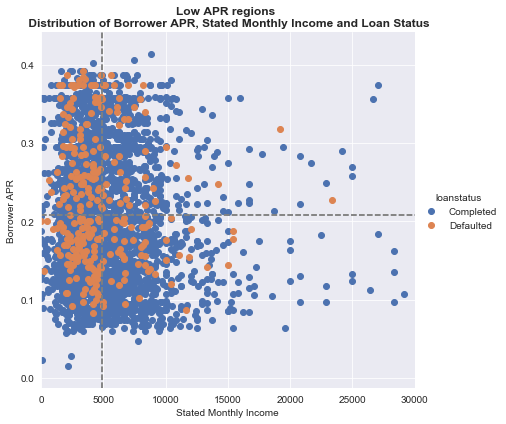

In [24]:
# Plot -- In Low APR regions, plot APR, Stated Monthly Income and Loan Status

g = sb.FacetGrid(data=df_filter_low, hue='loanstatus', height = 6)
g.map(plt.scatter, 'statedmonthlyincome', 'borrowerapr')
plt.xlim(0,30000)
plt.title ('Low APR regions \n Distribution of Borrower APR, Stated Monthly Income and Loan Status', weight='bold')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Borrower APR')
g.refline(x=df_clean["statedmonthlyincome"].median())
g.refline(y=df_clean["borrowerapr"].median())
g.add_legend()

plt.show();

### Considered the monthly loan payment, montly income, and whether the borrower is the owner of property, conditions of defaulted cases in different status of employment by low and high APR regions can be overviewed.

In both high and low APR regions, a postive correlation between monthly loan payment and monthly inomce can be seen for those completing the loan and work as employed, full time, self-employed, other, and retired. However, the relationship is not so obvious for those who are part-time, not-employed, and defaulted the loan. <br>

An interesting discovery is that the particularities of defaulted applicants can be summarized below: <br>

  a. Part-time / Self-employed / Other / Not-employed / Retired <br>
     ==> Monthly income < 5000 & Monthly loan payment < 500 <br>
  
  b. Employed (regardless whether is house owner) <br>
     ==> Monthly income < 10000 & Monthly loan payment < 500 <br>
  
  c. Full-time (regardless whether is house owner) <br>
     ==> Monthly income < 10000 & Monthly loan payment < 1000 <br>

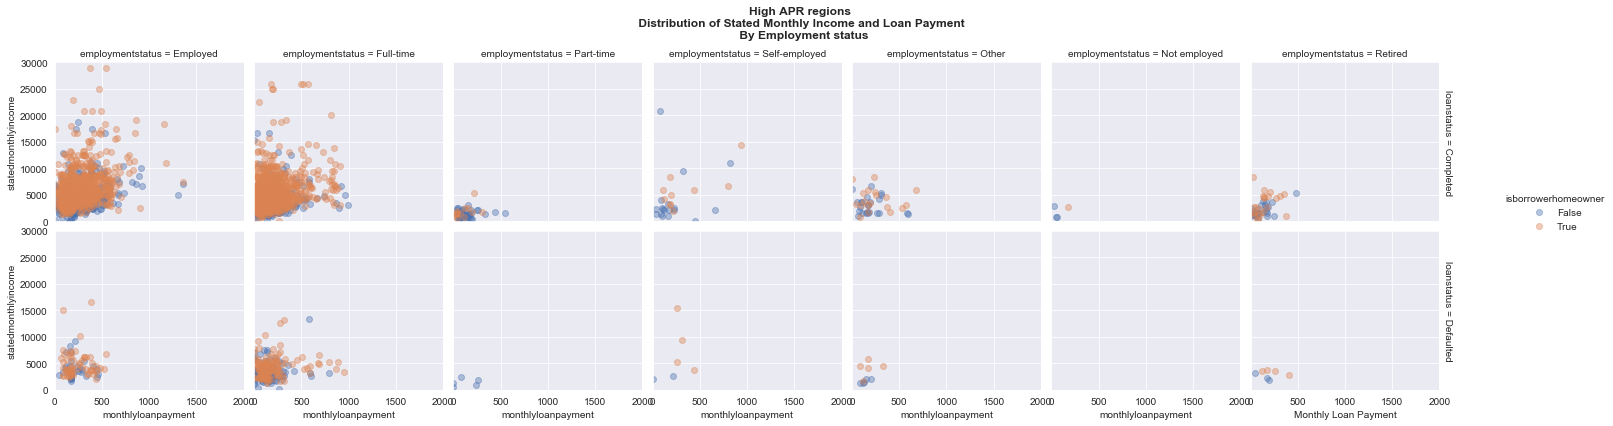

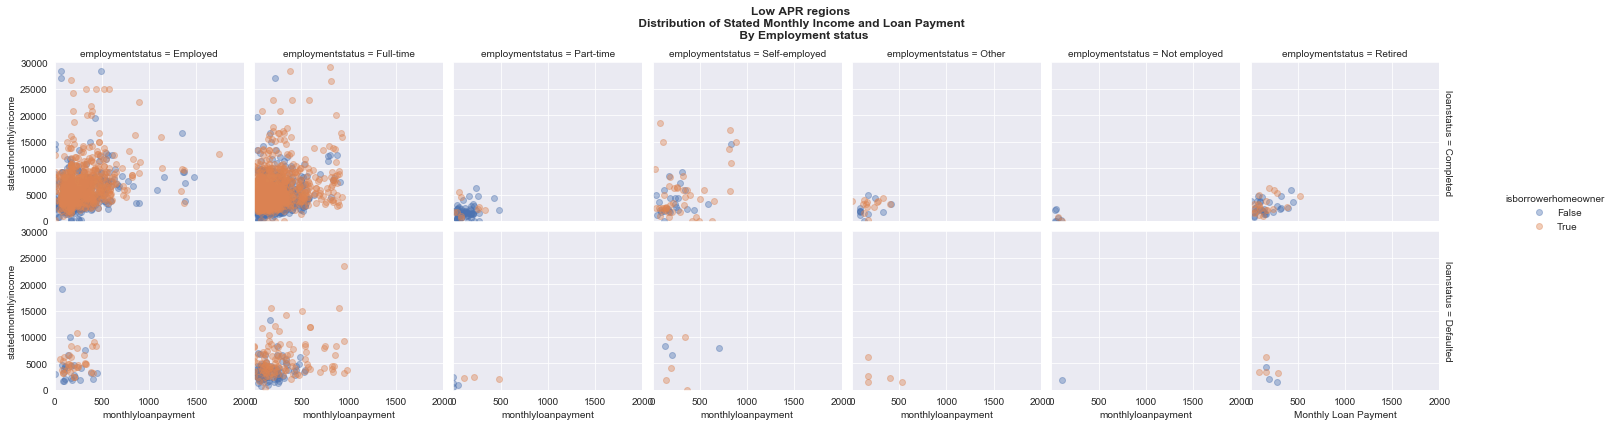

In [25]:
# Plot -- high APR region

g = sb.FacetGrid(data = df_filter_high, col = 'employmentstatus', row = 'loanstatus', 
                 margin_titles = True, hue='isborrowerhomeowner')
g.map(plt.scatter, 'monthlyloanpayment','statedmonthlyincome', alpha=2/5)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('High APR regions \n Distribution of Stated Monthly Income and Loan Payment \n By Employment status', weight='bold')
plt.xlim(0,2000)
plt.ylim(0,30000)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Stated Monthly Income')
g.add_legend()

# Plot -- high APR region

g = sb.FacetGrid(data = df_filter_low, col = 'employmentstatus', row = 'loanstatus', 
                 margin_titles = True, hue='isborrowerhomeowner')
g.map(plt.scatter, 'monthlyloanpayment','statedmonthlyincome', alpha=2/5)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Low APR regions \n Distribution of Stated Monthly Income and Loan Payment \n By Employment status', weight='bold')
plt.xlim(0,2000)
plt.ylim(0,30000)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Stated Monthly Income')
g.add_legend()

plt.show();



In [ ]:
!jupyter nbconvert 'Project_Loan Data from Prosper_Part_II.ipynb' --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Project_Loan Data from Prosper_Part_II.ipynb to slides
[NbConvertApp] Writing 1910463 bytes to Project_Loan Data from Prosper_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Project_Loan Data from Prosper_Part_II.slides.html
Use Control-C to stop this server
